In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats  


In [2]:
wh=pd.read_csv("E:/imarticus/excels/weight-height.csv",na_values="?")
wh.head(5)

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


<h3> UNDERSTANDING THE DATA </h3>

In [3]:
wh.isnull().sum()

Height    6
Weight    4
dtype: int64

In [4]:
wh.Height.describe()

count    194.000000
mean      68.822166
std        2.680003
min       61.937323
25%       67.002399
50%       68.486663
75%       70.892505
max       76.709835
Name: Height, dtype: float64

In [5]:
wh.Weight.describe()

count    196.000000
mean     186.220358
std       19.365577
min      146.739798
25%      171.911048
50%      183.869431
75%      199.179172
max      241.893563
Name: Weight, dtype: float64

<h3> Visualizing the data </h3>

<AxesSubplot:>

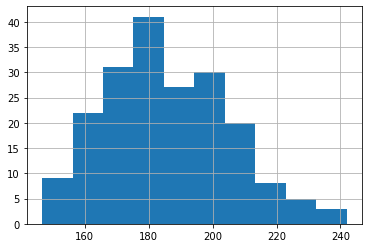

In [6]:
wh.Weight.hist()

In [7]:
stats.shapiro(wh.Weight)

ShapiroResult(statistic=nan, pvalue=1.0)

<AxesSubplot:>

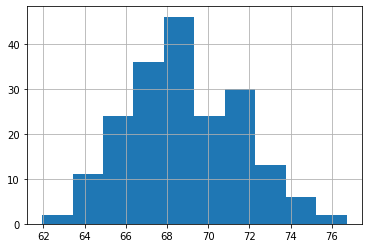

In [8]:
wh.Height.hist()

In [9]:
stats.shapiro(wh.Height)

ShapiroResult(statistic=nan, pvalue=1.0)

<h3> Both Height and Weight are normally distributed</h3>

In [10]:
wh.Weight.fillna(wh.Weight.median(),inplace=True) 
wh.Height.fillna(wh.Height.median(),inplace=True) 

<h3> Filling the null values with their medians because they both have outliers </h3>

In [21]:
wh.isnull().sum()

Height    0
Weight    0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x155a38fa520>,
 'caps': [<matplotlib.lines.Line2D at 0x155a38fab80>,
 'boxes': [<matplotlib.lines.Line2D at 0x155a38fa0d0>],
 'medians': [<matplotlib.lines.Line2D at 0x155a39072e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x155a3907670>],
 'means': []}

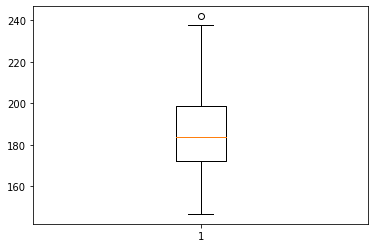

In [11]:
plt.boxplot(wh.Weight)

{'whiskers': [<matplotlib.lines.Line2D at 0x155a42786d0>,
 'caps': [<matplotlib.lines.Line2D at 0x155a4278df0>,
 'boxes': [<matplotlib.lines.Line2D at 0x155a42783d0>],
 'medians': [<matplotlib.lines.Line2D at 0x155a4286550>],
 'fliers': [<matplotlib.lines.Line2D at 0x155a42868e0>],
 'means': []}

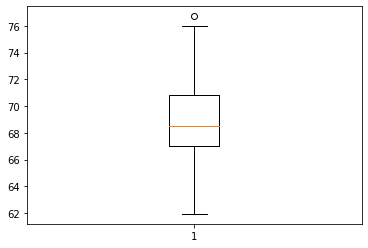

In [22]:
plt.boxplot(wh.Height)

<AxesSubplot:xlabel='Height', ylabel='Weight'>

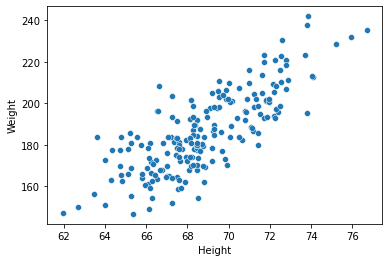

In [23]:
sns.scatterplot(x='Height',y='Weight',data=wh)

<h3>Checking for the correlation between the variables</h3>

In [24]:
stats.pearsonr(wh.Height,wh.Weight)

(0.7880577312908825, 1.3692990727512702e-43)

<h3>The correlation is positive medium, So we can proceed  for linear regression</h3>

<h2>Performing Linear Regression</h2><br>

<h3>Dividing the data for Train and Test</h3>

In [25]:
train=wh.iloc[:160]
test=wh.iloc[160:]

In [26]:
train_x=train.Height
train_y=train.Weight
train_xc=sm.add_constant(train_x)

C:\Users\Jothy Natarajan\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [27]:
model=sm.OLS(train_y,train_xc).fit() 

In [28]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     252.7
Date:                Mon, 04 Apr 2022   Prob (F-statistic):           1.34e-34
Time:                        01:04:32   Log-Likelihood:                -619.91
No. Observations:                 160   AIC:                             1244.
Df Residuals:                     158   BIC:                             1250.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -213.4749     25.090     -8.508      0.000    -263.030    -163.919
Height         5.7969      0.365     15.898      0.000       5.077       6.517
==============================================================================
Omnibus:                        1.666   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.435   Jarque-Bera (JB):                1.554
Skew:                           0.241   Prob(JB):                        0.460
Kurtosis:                       2.964   Cond. No.                     1.86e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.86e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
train_y_pre=model.predict(train_xc)

test_x=test.Height
test_y=test.Weight
test_xc=sm.add_constant(test_x)
test_y_pre=model.predict(test_xc)

C:\Users\Jothy Natarajan\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<h3>For train datas</h3>

C:\Users\Jothy Natarajan\AppData\Local\Temp/ipykernel_36328/2041012021.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(train.Height,train_y_pre,'r',color='red')


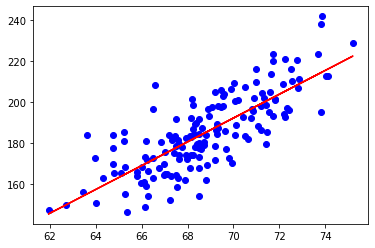

In [34]:
plt.scatter(train.Height,train.Weight,color='blue')
plt.plot(train.Height,train_y_pre,'r',color='red')
plt.show()

<h3>For test datas</h3>

C:\Users\Jothy Natarajan\AppData\Local\Temp/ipykernel_36328/3224931797.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(test.Height,test_y_pre,'r',color='red')


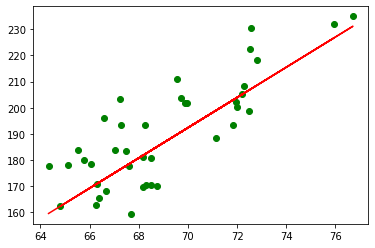

In [35]:
plt.scatter(test.Height,test.Weight,color='green')
plt.plot(test.Height,test_y_pre,'r',color='red')
plt.show()